# <center>Laboratorium 2<br>Metody Numeryczne</center>

Biblioteki niezbędne do wykonania zadania:

In [1]:
import main


import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

***Zadanie 1.***  
Zdefiniuj w notatniku funkcję $f(x)= x^{3} - 3x$ i sporządź jej wykres dla argumentów z przedziału:  
1. $x\in<-1,1>$  
2. $x\in<-5,5>$  
3. $x\in<0,5>$
  
***Wskazówki***
Jako argumentu funkcji można użyć numpy array.  

Do wizualizacji wyników w Pythonie używa się pakietu [Matplotlib](https://matplotlib.org/). Działanie tego pakietu prezentuje przykład:

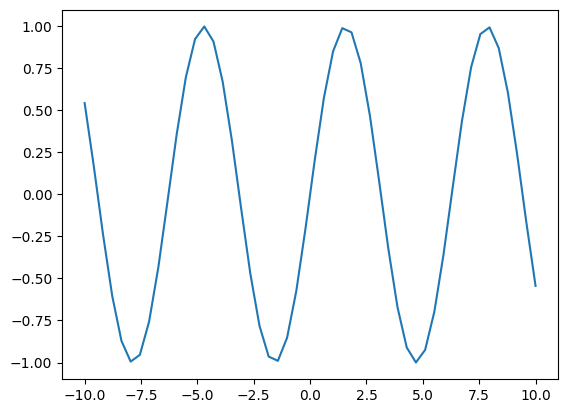

In [2]:
x = np.linspace(-10,10)
# inicjalizacja wektora f(x) = sin(x)
y = np.sin(x)
plt.plot(x, y, label ='sin(x)')
plt.show()

Wspierając się dokumentacją [Matplotlib](https://matplotlib.org/) dodaj do wykresu etykiety osi, tytuł, grida i legendę.

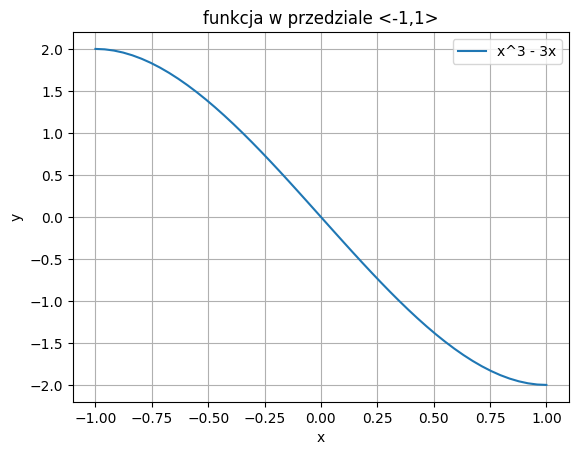

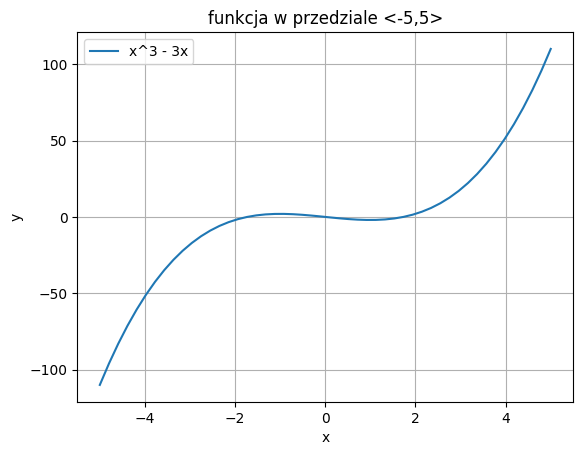

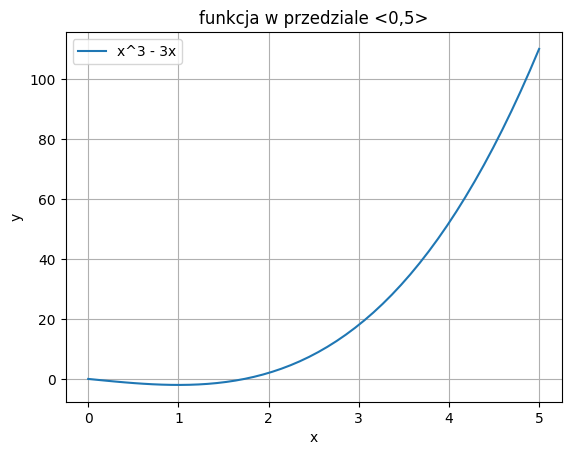

In [3]:
func = lambda x : x**3 - 3*x
x_tbl = (np.linspace(-1,1), np.linspace(-5,5), np.linspace(0,5))
titles = ('funkcja w przedziale <-1,1>', 'funkcja w przedziale <-5,5>', 'funkcja w przedziale <0,5>')
for i in range(3):
    plt.plot(x_tbl[i],func(x_tbl[i]), label = 'x^3 - 3x')
    plt.grid()
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(titles[i])
    plt.show()

***Zadanie 2.***  
Dla funkcji z zadania pierwszego używając wektora $x \in <-10,10>$ wyrysuj wykres dla argumentów:
1. $x\in<-1,1>$  
2. $x\in<-10,-1>$  
3. $x\in<1,10>$

Używając do tego funkcji: [ylim](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.ylim.html), [xlim](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.xlim.html), [axis](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.axis.html)

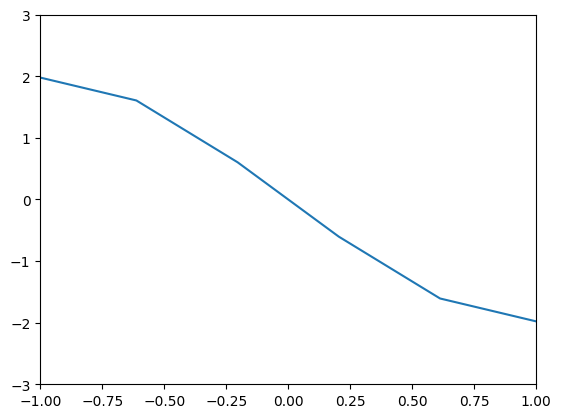

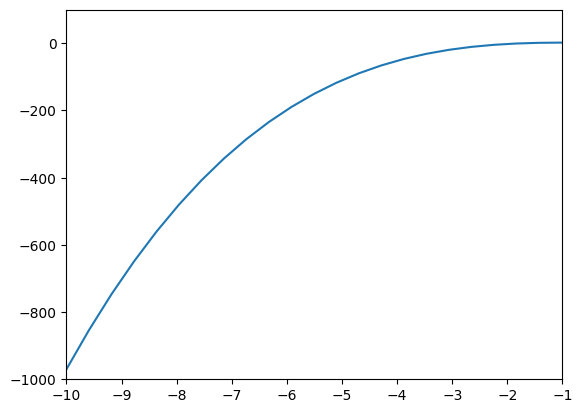

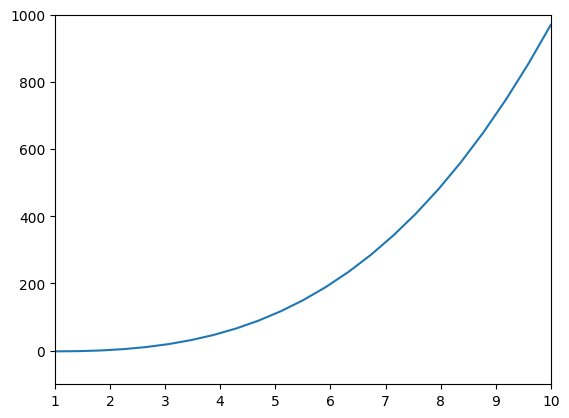

In [4]:
axis_tbl = [[-1,1,-3,3],[-10,-1,-1000,100], [1,10,-100,1000]]
for i in range(3):
    plt.plot(x, func(x))
    plt.axis(axis_tbl[i])
    plt.show()


***Zadanie 3.*** 
Oblicz ilość ciepła, które wydzieli się podczas hamowania jeżeli opisuje je zależność:  
  
$Q = \cfrac{mv^2}{2}$  
  
jeżeli $m = 2500g$, $v = 60km/h$, wypisz wynik oraz podaj w kilokaloriach i dżulach. Wykreśl wykresy które zobrazują zmianę ilości ciepła w procesie hamowania dla ciała o masie $3000g$ i prędkości $v\in<200,0>km/h$, przedstawiając ciepło hamowania na pierwszym w skali liniowej na drugim w skali logarytmicznej.  

***Wsakzówka:*** Do stworzenia wykresów z osią logarytmiczną skorzystaj z funkcji: [semilogy](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html), [xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html?highlight=xlim#matplotlib.pyplot.xlim) i [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) z pakietu *Matplotlib*. 

ciepło w dżulach = 347.2222222222223
ciepło w kilokaloriach = 0.08298819444444445


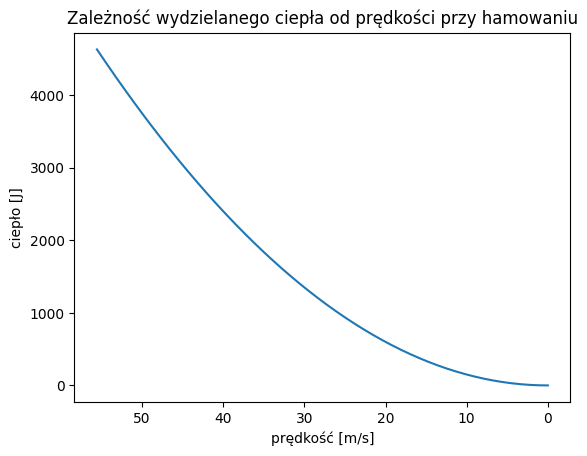

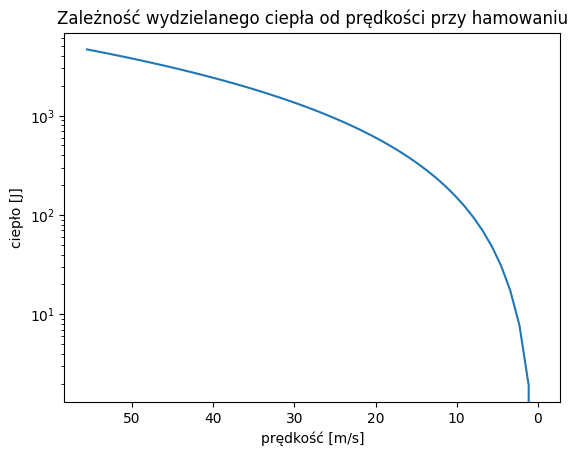

In [5]:
heat = lambda m,v : m*v**2/2 
print("ciepło w dżulach = " + str(heat(2.5,600/36)))
print("ciepło w kilokaloriach = " + str(heat(2.5,600/36) * 0.000239006))
v_range = np.linspace(2000/36, 0)
plt.plot(v_range, heat(3, v_range))
plt.gca().invert_xaxis()
plt.xlabel('prędkość [m/s]')
plt.ylabel('ciepło [J]')
plt.title('Zależność wydzielanego ciepła od prędkości przy hamowaniu')
plt.show()
plt.semilogy(v_range, heat(3, v_range))
plt.title('Zależność wydzielanego ciepła od prędkości przy hamowaniu')
plt.xlabel('prędkość [m/s]')
plt.ylabel('ciepło [J]')
plt.gca().invert_xaxis()
plt.show()

***Zadanie 4.***  
Częstą praktyką szczególnie w dziedzinie analizy danych, statystyce, uczeniu maszynowym, itp. jest tworzenie na podstawie biblioteki [Matplotlib](https://matplotlib.org/) własnych szablonów wykresów stworzonych na podstawie funkcji. Najprostszy przykład to przeładowanie funkcji plot tak by wykres miał czerwony kolor:

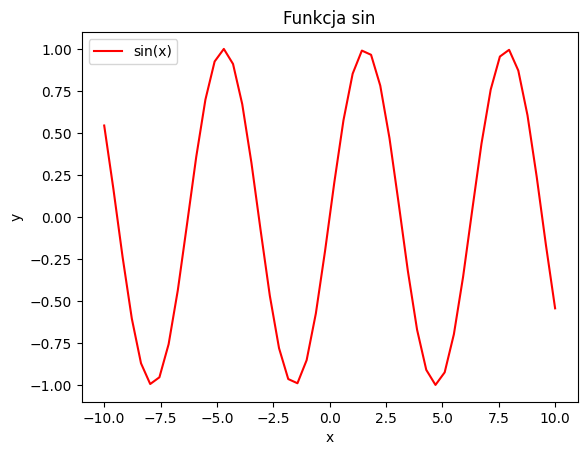

In [6]:
def my_plot(x,y,xlabel,ylabel,title,label):
    if x.shape != y.shape or  min(x.shape)==0:
        return None
    fig, ax = plt.subplots()
    ax.plot(x, y, 'r', label=label)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.legend()
    return fig

x = np.linspace(-10,10)
# inicjalizacja wektora f(x) = sin(x)
y = np.sin(x)
my_plot(x,y,'x','y','Funkcja sin', 'sin(x)')
plt.show()

Zaimplementuj funkcję *compare\_plot* w taki sposób by na jednym wykresie wyrysowane były dwie funkcje typu [plot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). Pierwsza ma rysować się w kolorze niebieski i grubość lini ma wynosić 4, druga natomiast w kolorze czerwonym o grubości lini 2. Domyślnie ma być dodawana legenda. Dodatkowo użytkownik ma mieć możliwość ustawienia parametrów:
- x1 - wektor wartości osi x dla pierwszego wykresu,
- y1 - wektor wartości osi y dla pierwszego wykresu,
- x2 - wektor wartości osi x dla drugiego wykresu,
- y2 - wektor wartości osi x dla drugiego wykresu,
- xlabel - opis osi x,
- ylabel - opis osi y,
- title - tytuł wykresu ,
- label1 - nazwa serii z pierwszego wykresu,
- label2 - nazwa serii z drugiego wykresu.

Jeżeli nie da się wyrysować danych należy zwrócić wartość None.

** Zadanie 5 **  
Za pomocą funkcji *compare\_plot* rozwiąż graficznie równanie: $f(x) = g(x)$, gdzie:  
$f(x) = x+2$  
$g(x) = x^2 -2sin(x) + 3$

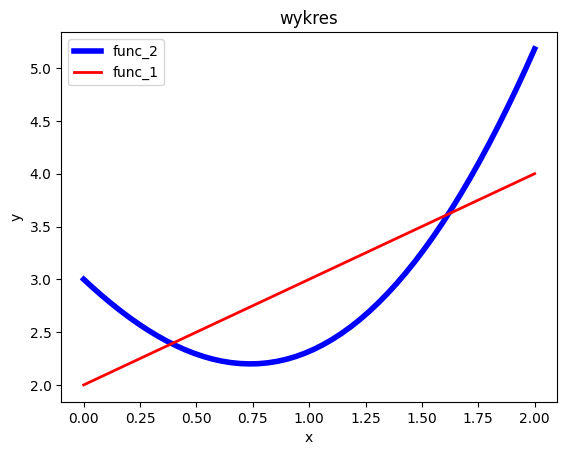

In [7]:
x1 = np.linspace(0,2)
x2 = np.linspace(0,2)
func_1 = x1 + 2
func_2 = x2**2 - 2* np.sin(x2) + 3
main.compare_plot(x1, func_1, x2 , func_2,'x', 'y', 'wykres', 'func_1', 'func_2')
plt.show()

***Zadanie 6.***   
Innym przydatnym sposobem prezentowania wykresów jest [subplot](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplot.html), czyli wyrysowanie obok siebie kilku wykresów. Zaimplementuj funkcję parallel_plot tak by obok siebie wyrysowane zostały dwa standardowe ploty i użytkownik mógł podać parametry:
- x1 - wektor wartości osi x dla pierwszego wykresu,
- y1 - wektor wartości osi y dla pierwszego wykresu,
- x2 - wektor wartości osi x dla drugiego wykresu,
- y2 - wektor wartości osi x dla drugiego wykresu,
- x1label - opis osi x dla pierwszego wykresu,
- y1label - opis osi y dla pierwszego wykresu,
- x2label - opis osi x dla drugiego wykresu,
- y2label - opis osi y dla drugiego wykresu,
- title - tytuł wykresu,
- orientation - parametr przyjmujący wartość '-' jeżeli subplot ma posiadać dwa wiersze albo '|' jeżeli ma posiadać dwie kolumny.

Jeżeli nie da się wyrysować danych należy zwrócić wartość None.

 

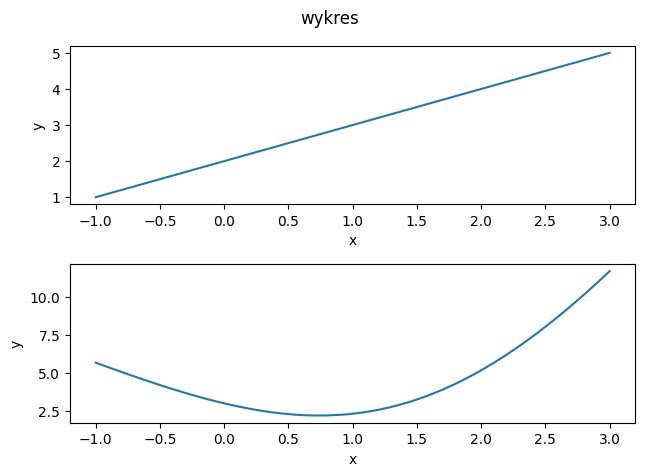

In [8]:
x1 = np.linspace(-1,3)
x2 = np.linspace(-1,3)
func_1 = x1 + 2
func_2 = x2**2 - 2* np.sin(x2) + 3
main.parallel_plot(x1, func_1, x2 , func_2,'x', 'y',
                       'x', 'y', 'wykres', '-')
plt.show()

***Zadanie 7.***  
Za pomocą funkcji *parallel\_plot*  i przedstaw na jednym z nich [Spirale logarytmiczną](https://pl.wikipedia.org/wiki/Spirala_logarytmiczna) w szerokim przedziale, a w drugim w okolicy zera.

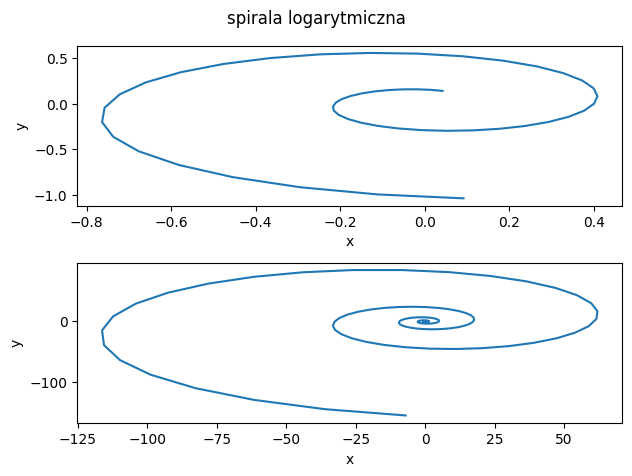

In [12]:
vect1 = np.arange(-5,5,0.2)
a = 0.4
b = 0.2
x1 = a*np.exp(b*vect1) * np.cos(vect1)
y1 = a *np.exp(b*vect1) * np.sin(vect1)
vect2 = np.arange(-30,30,0.2)
x2 = a*np.exp(b*vect2) * np.cos(vect2)
y2 = a *np.exp(b*vect2) * np.sin(vect2)
main.parallel_plot(x1, y1, x2 , y2,'x', 'y',
                       'x', 'y', 'spirala logarytmiczna', '-')
plt.show()

***Zadanie 8.***  
Zaimplementuj funkcję *log\_plot* która będzie tworzyć wykres w skalach logaritmicznych. Skale logarytmiczne mają być ustawione zgodnie z parameterem *log\_axis* gdzie wartość:
- 'x' oznacza skale logarytmiczną na osi x,
- 'y' oznacza skale logarytmiczną na osi y,
- 'xy' oznacza skale logarytmiczną na obu osiach.

Dodatkowo użytkownik ma mieć możliwość ustawienia parametrów:
- x - wektor wartości osi x,
- y - wektor wartości osi y,
- xlabel - opis osi x,
- ylabel - opis osi y,
- title - tytuł wykresu.

**Zadanie 9.**  
Przy pomocy funkcji *log\_plot* przedstaw różne warianty funkcji z zadania 3.

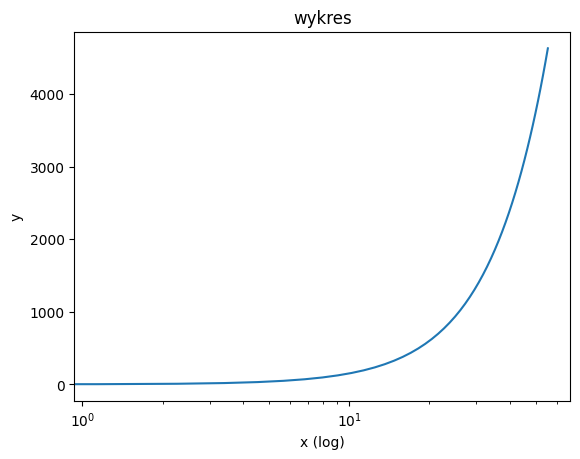

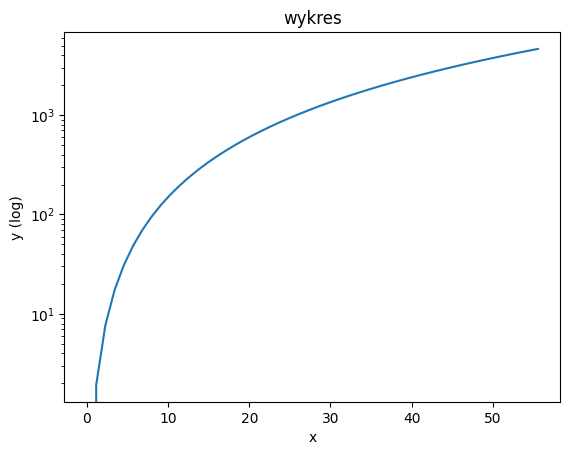

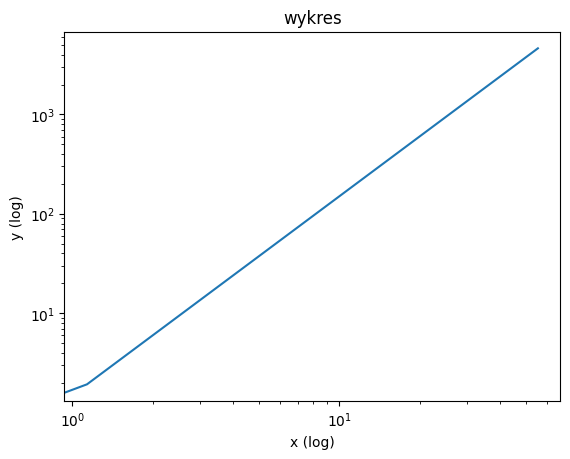

In [10]:
heat = lambda m,v : m*v**2/2 
v_range = np.linspace(2000/36, 0)
main.log_plot(v_range, heat(3,v_range),'x (log)','y','wykres','x')
plt.show()
main.log_plot(v_range, heat(3,v_range),'x','y (log)','wykres','y')
plt.show()
main.log_plot(v_range, heat(3,v_range),'x (log)','y (log)','wykres','xy')
plt.show()

**Zadanie 10.**  
Wykorzystując funkcje *semilogx* narysuj funkcję $cos(2\pi x)$ w zakresie co najmniej od $-10^2$ do $10^0$. Uzyj do tego trzech róznych wartości kroków, gdzie jeden będzie równy około 0.02, a reszta nieznacznie większa, dla generowania wartości funkcji (za pomocą *np.arrange*), a następnie narysuj wykresy według schematu: węzły (punkty, w których znamy wartośc funckji) zaznacz pomoca kropek, połączonych liniami przerywanymi. Zauwaz jak wykresy zachowują się w miarę zwiększania kroku.  Dla porównania narysuj takze wykres niestosujac skali logarytmicznej. Wykres umieść w siatce 2x2 wykorzystując *subplot*. Nie zapomnij o oznaczeniu tytułów osi i wykresów.

Text(0.5, 1.03, 'wykresy funkcji cos(2*pi*x) z różnym korkiem')

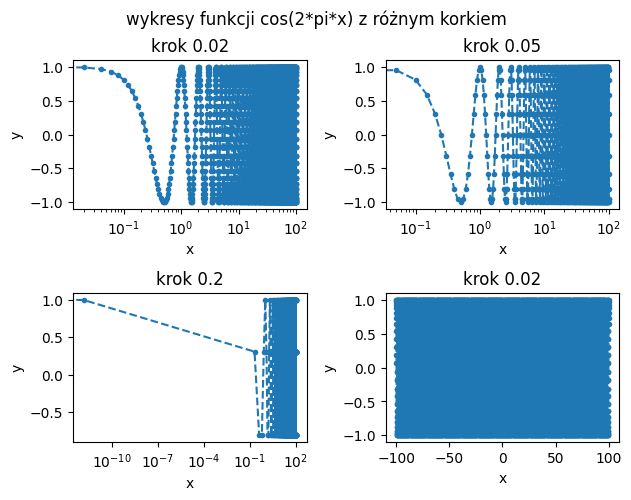

In [38]:
func_cos = lambda x : np.cos(2 *np.pi * x)
x1 = np.arange(-100,100,0.02)
x2 = np.arange(-100,100,0.05)
x3 = np.arange(-100,100,0.2)
fig, plot_10 = plt.subplots(2,2)
plot_10[0,0].semilogx(x1, func_cos(x1),'--.' )
plot_10[0,0].set(xlabel='x', ylabel='y', title = 'krok 0.02')

plot_10[0,1].semilogx(x2, func_cos(x2),'--.' )
plot_10[0,1].set(xlabel='x', ylabel='y', title = 'krok 0.05')

plot_10[1,0].semilogx(x3, func_cos(x3),'--.' )
plot_10[1,0].set(xlabel='x', ylabel='y', title = 'krok 0.2')

plot_10[1,1].plot(x1, func_cos(x1),'--.' )
plot_10[1,1].set(xlabel='x', ylabel='y', title = 'krok 0.02')
fig.tight_layout(pad=1.0)
plt.suptitle('wykresy funkcji cos(2*pi*x) z różnym korkiem', y=1.03)




Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)